# Optimising Retail Bank Strategies using RFM analysis customer based segmentation

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# This scripts reads the dataset
df = pd.read_csv('../bank_data_C (1).csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1041610,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1041611,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1041612,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


## Data Cleaning

In [3]:
df.info() # checks information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [4]:
#This script changes the column data types
# Ensure all values in TransactionTime are 6 digits by padding with leading zeros
df['TransactionTime'] = df['TransactionTime'].astype(str).str.zfill(6)
# Convert TransactionTime to proper time format
df['TransactionTime'] = pd.to_datetime(df['TransactionTime'], format='%H%M%S', errors='coerce').dt.time # Convert TransactionTime from HHMMSS format to HH:MM:SS format
df['TransactionDate']= pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [5]:
# This scripts checks for missing values
Nan_values = df.isnull().sum()
Nan_values

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [6]:
#checks for duplicated values
duplicated_values = df.duplicated().sum()
duplicated_values

0

In [7]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


## Exploratory Data Analysis

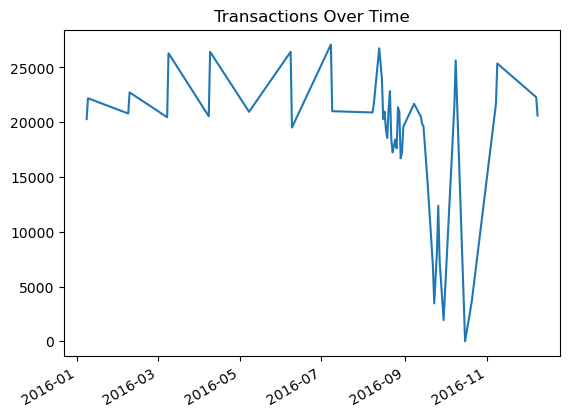

In [37]:
## Transcation trends analysis
df['TransactionDate'].value_counts().sort_index().plot()
plt.title('Transactions Over Time')
plt.show()

In [38]:
# filter dates where year is greater than 2025
# invalid_dates = df[df['CustomerDOB'].dt.year > 2025]
valid_dob = df[(df['CustomerDOB'].dt.year >= 1900) & (df['CustomerDOB'].dt.year <= 2025)]
invalid_dob = len(df) - len(valid_dob)
print(f"Number of valid rows: {len(valid_dob)}")
print(f"Number of invalid rows: {invalid_dob}")
#display the valid rows
valid_dob


Number of valid rows: 985322
Number of invalid rows: 56292


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,AgeGroup
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,30,18-35
1,T2,C2142763,1988-02-06,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,37,35-50
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,28,18-35
3,T4,C5342380,1988-02-06,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,37,35-50
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,37,35-50
...,...,...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,34,18-35
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,33,18-35
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,35,18-35
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,46,35-50


In [39]:
# Print the maximum transaction amount in the valid_dob DataFrame
max_transaction_valid = valid_dob['TransactionAmount (INR)'].max()
print(f"Maximum Transaction Amount in valid DOB: {max_transaction_valid}")

Maximum Transaction Amount in valid DOB: 1560034.99


In [40]:
# Filter and display invalid rows
invalid_rows = df[(df['CustomerDOB'].dt.year < 1900) | (df['CustomerDOB'].dt.year > 2025)]
invalid_rows

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,AgeGroup
16,T17,C1376215,1800-01-01,M,MUMBAI,77495.15,2016-01-08,12:47:27,1423.11,225,NaN
22,T23,C7018081,1800-01-01,M,WAYS PANCHKUVA AHMEDABAD,143.07,2016-03-08,10:47:18,110.00,225,NaN
28,T29,C7935438,1800-01-01,M,MOHALI,969436.12,2016-03-08,18:36:34,36.90,225,NaN
34,T36,C1211387,1800-01-01,M,AHMEDABAD,11791.25,2016-03-08,12:59:15,1075.00,225,NaN
150,T152,C3334638,1800-01-01,M,PUNE,700.00,2016-09-08,02:49:12,1500.00,225,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1041491,T1048444,C7261226,1800-01-01,M,BHILAI,1393.33,2016-09-18,10:24:27,200.00,225,NaN
1041500,T1048453,C3813481,1800-01-01,M,NEW DELHI,984605.24,2016-09-18,08:46:44,219.00,225,NaN
1041578,T1048532,C6937679,1800-01-01,M,NEW DELHI,50698.90,2016-09-18,18:43:19,598.86,225,NaN
1041580,T1048534,C7431884,1800-01-01,M,MANDIR DHANBAD,53771.64,2016-09-18,18:40:49,520.00,225,NaN


In [41]:
max_transaction_invalid = invalid_rows['TransactionAmount (INR)'].max()
print(f"Maximum Transaction Amount in invalid DOB: {max_transaction_invalid}")

Maximum Transaction Amount in invalid DOB: 557000.73


In [42]:
#comparing the mean and median of the CustomerDOB column to check for outliers
mean = df['CustomerDOB'].mean()
median = df['CustomerDOB'].median()
skewness = df['CustomerDOB'].dt.year.skew()
print(f"Mean: {mean}, Median: {median}, Skewness: {skewness}")


Mean: 1977-09-01 11:29:28.586827904, Median: 1988-02-06 00:00:00, Skewness: -3.862965590070244


Yes there are outliers, the column is negatively skewed because the mean is less than the meidan

/Users/usmanali/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


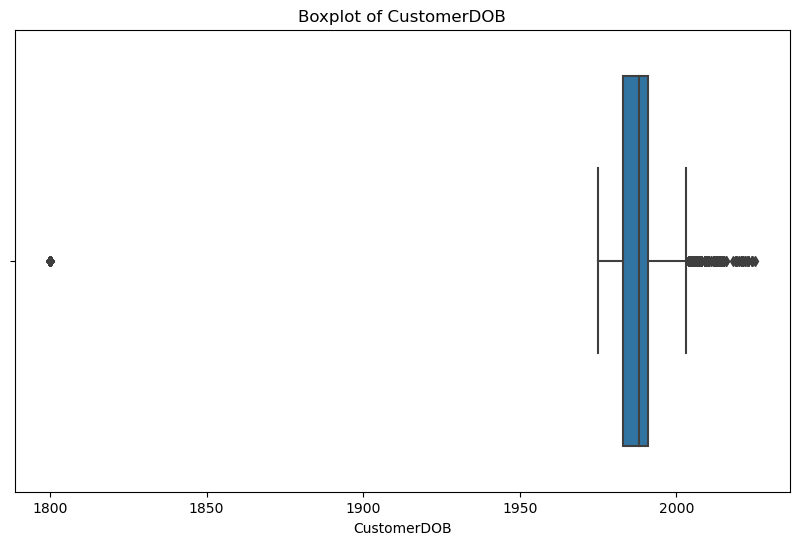

In [43]:
# checking for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(df['CustomerDOB'].dt.year)
plt.title('Boxplot of CustomerDOB')
plt.show()

In [52]:
## Removal of outliers
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = df['CustomerDOB'].dt.year.quantile(0.25)
q3 = df['CustomerDOB'].dt.year.quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

#Remove rows where CustomerDOB falls outside the bounds
df_cleaned = df[(df['CustomerDOB'].dt.year >= lower_bound) & (df['CustomerDOB'].dt.year <= upper_bound)].copy()
# Display the cleaned DataFrame
print(f"Number of rows after removing outliers: {len(df_cleaned)}")
# Display the cleaned DataFrame
df_cleaned

Lower Bound: 1971.0, Upper Bound: 2003.0
Number of rows after removing outliers: 984964


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,AgeGroup
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,30,18-35
1,T2,C2142763,1988-02-06,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,37,35-50
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,28,18-35
3,T4,C5342380,1988-02-06,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,37,35-50
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,37,35-50
...,...,...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,34,18-35
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,33,18-35
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,35,18-35
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,46,35-50


In [45]:
df_cleaned['CustomerDOB'].dt.year.describe()

count    984964.000000
mean       1987.359688
std           4.875984
min        1975.000000
25%        1984.000000
50%        1988.000000
75%        1991.000000
max        2003.000000
Name: CustomerDOB, dtype: float64

In [46]:
# Recalculating the mean and median of the CustomerDOB column after removing outliers
mean = df_cleaned['CustomerDOB'].dt.year.mean()
median = df_cleaned['CustomerDOB'].dt.year.median()
skewness = df_cleaned['CustomerDOB'].dt.year.skew()

print(f"Mean: {mean}, Median: {median}, Skewness: {skewness}")

Mean: 1987.359688272871, Median: 1988.0, Skewness: -0.5218427298024572


Removing outliers was the best for this dataset, as it reduced the skewness and brought the mean closer to the median, because the mean and median are now much closer, indicating a more symmetric distribution.
The skewness has reduced significantly (-0.52), which is closer to 0, suggesting the data is now only slightly negatively skewed.

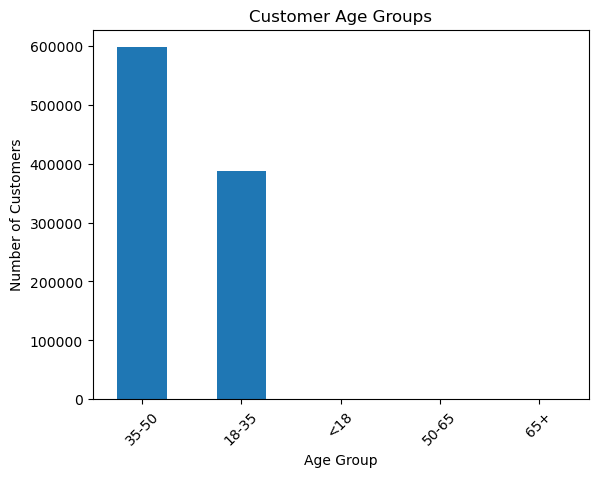

In [47]:
## calculating and grouping customers by age
df['Age'] = (pd.to_datetime('today') - df['CustomerDOB']).dt.days // 365
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['<18', '18-35', '35-50', '50-65', '65+'])
df['AgeGroup'].value_counts().plot(kind='bar')
plt.title('Customer Age Groups')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

Age
35     600003.45
36    1150012.66
37    3822830.50
39     720001.16
41    1523406.16
43     525003.83
44     455122.00
46    1380002.88
47     514320.00
48    2551167.21
Name: TransactionAmount (INR), dtype: float64


NameError: name 'mticker' is not defined

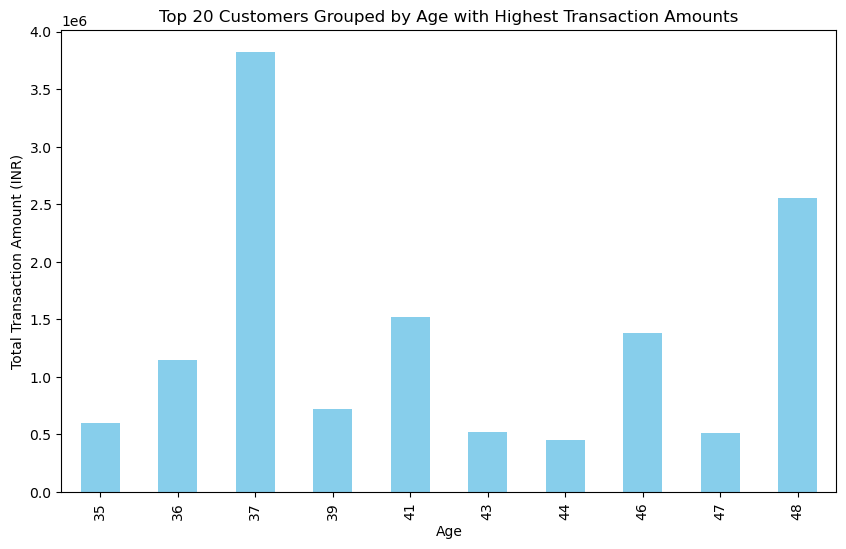

In [54]:
# Calculate the age of customers
df_cleaned['Age'] = (pd.to_datetime('today') - df_cleaned['CustomerDOB']).dt.days // 365

# Sort the DataFrame by transaction amount in descending order and select the top 20 customers
top_20_customers = df_cleaned.sort_values(by='TransactionAmount (INR)', ascending=False).head(20)

# Group the top 20 customers by age and sum their transaction amounts
grouped_by_age = top_20_customers.groupby('Age')['TransactionAmount (INR)'].sum()

# Display the grouped data
print(grouped_by_age)

# Plot the grouped data
plt.figure(figsize=(10, 6))
grouped_by_age.plot(kind='bar', color='skyblue')
plt.title('Top 20 Customers Grouped by Age with Highest Transaction Amounts')
plt.xlabel('Age')
plt.ylabel('Total Transaction Amount (INR)')

 #Remove scientific notation from the y-axis
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)

plt.xticks(rotation=45)
plt.show()